In [36]:
import numpy as np
import pandas as pd
import missingno as msno
import calendar
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [37]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data["date"] = train_data.datetime.apply(lambda x : x.split()[0])
train_data["hour"] = train_data.datetime.apply(lambda x : x.split()[1].split(":")[0])
train_data["weekday"] = train_data.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString, '%Y-%m-%d').weekday()])
train_data["month"] = train_data.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString, '%Y-%m-%d').month])
train_data["season"] = train_data.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
train_data["weather"] = train_data.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    train_data[var] = train_data[var].astype('category')
    
train_data = train_data.drop('datetime', axis=1)

train_data_withoutOutlier = train_data[np.abs(train_data['count'] - train_data['count'].mean()) <= 3 * train_data['count'].std()]

(10739, 15)
before:  [[ 1.          0.98525358  0.46077362  0.30432822 -0.05639378 -0.0194597
   0.38595372]
 [ 0.98525358  1.          0.45631899  0.30107447 -0.03546652 -0.05940275
   0.3819675 ]
 [ 0.46077362  0.45631899  1.          0.49808542 -0.34120427  0.09233365
   0.70476411]
 [ 0.30432822  0.30107447  0.49808542  1.         -0.26352526  0.09610353
   0.96620948]
 [-0.05639378 -0.03546652 -0.34120427 -0.26352526  1.         -0.32015832
  -0.31702815]
 [-0.0194597  -0.05940275  0.09233365  0.09610353 -0.32015832  1.
   0.10607385]
 [ 0.38595372  0.3819675   0.70476411  0.96620948 -0.31702815  0.10607385
   1.        ]]
after:  [[ 0.          0.98525358  0.46077362  0.30432822 -0.05639378 -0.0194597
   0.38595372]
 [ 0.          0.          0.45631899  0.30107447 -0.03546652 -0.05940275
   0.3819675 ]
 [ 0.          0.          0.          0.49808542 -0.34120427  0.09233365
   0.70476411]
 [ 0.          0.          0.          0.         -0.26352526  0.09610353
   0.96620948]
 

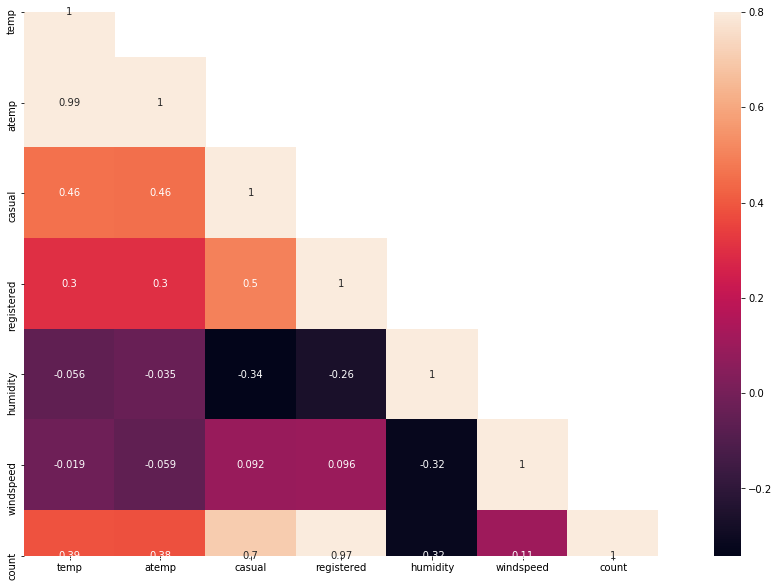

In [42]:
print(train_data_withoutOutlier.shape)

corrMatt = train_data_withoutOutlier[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
print('before: ', mask)
mask[np.tril_indices_from(mask)] = False
print('after: ', mask)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

(10886, 15)
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
hour          category
weekday       category
month         category
dtype: object
   season holiday workingday  \
0  Spring       0          0   
1  Spring       0          0   

                                             weather  temp   atemp  humidity  \
0   Clear + Few clouds + Partly cloudy + Partly c...  9.84  14.395        81   
1   Clear + Few clouds + Partly cloudy + Partly c...  9.02  13.635        80   

   windspeed  casual  registered  count        date hour   weekday    month  
0        0.0       3          13     16  2011-01-01   00  Saturday  January  
1        0.0       8          32     40  2011-01-01   01  Saturday  January  


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

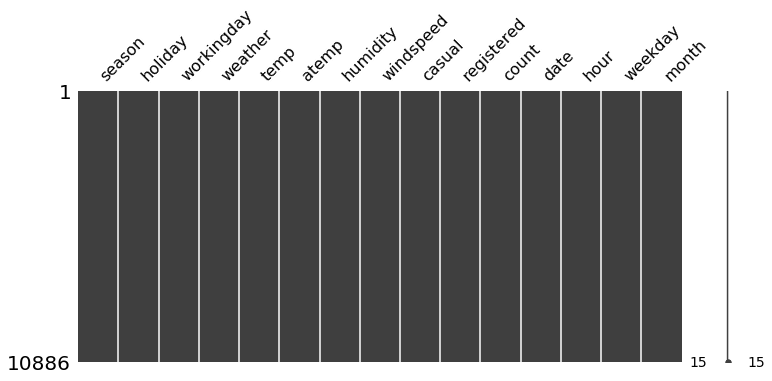

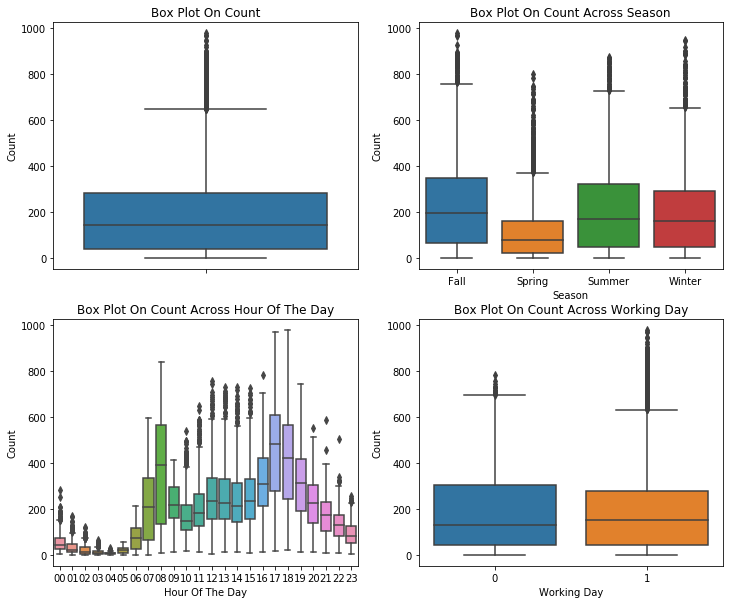

In [38]:
print(train_data.shape)
print(train_data.dtypes)
print(train_data.head(2))##
msno.matrix(train_data,figsize=(12,5))

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=train_data,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=train_data,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=train_data,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=train_data,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")